In [1]:
#import library
import numpy as np #python library used for working with arrays
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations 
import seaborn as sns #data visualization library based on matplotlib
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D #provides some basic 3D plotting
from sklearn.preprocessing import StandardScaler #API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set

In [2]:
#import dataset
df=pd.read_csv('C:/Users/PURUSHOTHAM REDDY/Desktop/US_Accidents_june20.csv')


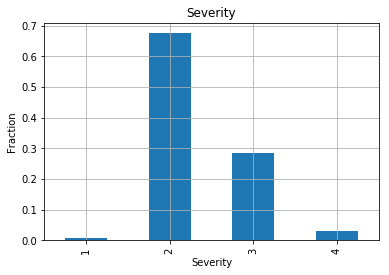

In [3]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');
#severity of the accidents lies at level 2 and least severity level at 1

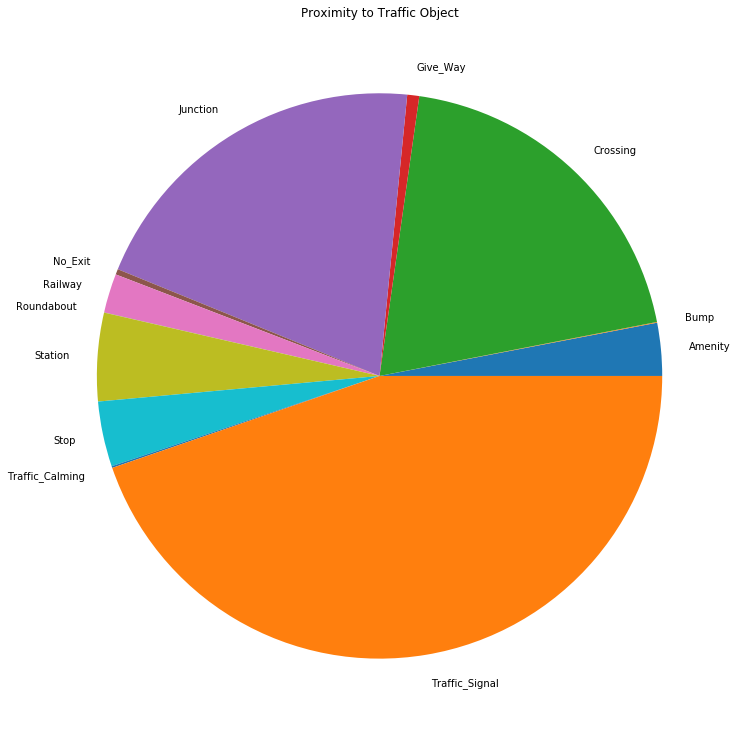

In [5]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
bools = booldf.sum(axis=0)#Return the sum of the values for the requested axis.
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');
#by the pie chart we can observe that most accidents are caused at traffic signal

In [6]:
df1 = df

In [7]:
df1.isnull().sum()#returns the number of missing values in the data set

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [8]:

df1.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [9]:
#droping features that have more missing values and features that are unwanted
df1 = df1.drop(['Distance(mi)', 'TMC', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [10]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Number,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,2584.0,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,Day


In [11]:

cols = ["End_Lat", "End_Lng", "Number"]
df1 = df1.drop(cols, axis=1)#axis =1 dropping columns

In [12]:
df1.isnull().sum()

ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Timezone                3880
Weather_Timestamp      43323
Temperature(F)         65732
Wind_Chill(F)        1868249
Humidity(%)            69687
Pressure(in)           55882
Visibility(mi)         75856
Wind_Direction         58874
Wind_Speed(mph)       454609
Precipitation(in)    2025874
Weather_Condition      76138
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset           115
dtype: int64

In [13]:
#data preprocessing 
#handling NAN values
pmean = df1['Pressure(in)'].mean()
tmean = df1['Temperature(F)'].mean()
wcmean = df1['Wind_Chill(F)'].mean()
hmean = df1['Humidity(%)'].mean()
wsmean = df1['Wind_Speed(mph)'].mean()
prmean = df1['Precipitation(in)'].mean()

In [14]:
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)


In [15]:

df1['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)

In [16]:

df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)

In [17]:
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)

In [18]:

df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)

In [19]:
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [20]:
df1.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Timezone              3880
Weather_Timestamp    43323
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       75856
Wind_Direction       58874
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    76138
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset         115
dtype: int64

In [21]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Timezone', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [22]:
visMode = df1["Visibility(mi)"].mode()
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)

In [23]:
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [24]:
df1.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID', 'Source'], axis = 1, inplace = True)

In [25]:

df1.dropna(axis=0, inplace=True)

In [26]:
#after preprocessing 
#done with the missing values
df1.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [27]:
#Encode target labels with value between 0 and 1
#used to transform non-numerical labels to numerical labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])

df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,39.865147,-84.058723,36.9,53.557295,91.0,29.68,10.0,1,8.219025,...,0,0,0,0,0,0,0,0,0,1
1,2,39.928059,-82.831184,37.9,53.557295,100.0,29.65,10.0,1,8.219025,...,0,0,0,0,0,0,0,0,0,1
2,2,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,16,3.500000,...,0,0,0,0,0,0,0,1,0,1
3,3,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,16,4.600000,...,0,0,0,0,0,0,0,0,0,1
4,2,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,16,3.500000,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Model building 

In [28]:
#libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [29]:
Y = df1['Severity']
X = df1.drop(['Severity'], axis = 1)
X.head()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,39.865147,-84.058723,36.9,53.557295,91.0,29.68,10.0,1,8.219025,0.020000,...,0,0,0,0,0,0,0,0,0,1
1,39.928059,-82.831184,37.9,53.557295,100.0,29.65,10.0,1,8.219025,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,16,3.500000,0.015983,...,0,0,0,0,0,0,0,1,0,1
3,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,16,4.600000,0.015983,...,0,0,0,0,0,0,0,0,0,1
4,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,16,3.500000,0.015983,...,0,0,0,0,0,0,0,1,0,0


In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)#70 30

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.271693,0.860574,-0.755296,0.000229,0.660700,0.587450,0.29934,-1.361289,0.000445,0.000212,...,-0.296785,-0.035068,-0.094595,-0.007214,-0.142887,-0.122774,-0.020188,2.151105,0.0,1.679880
1,-0.505229,0.853989,-1.075229,-0.974682,-1.381247,0.865397,0.29934,1.081012,-0.265599,0.000212,...,-0.296785,-0.035068,-0.094595,-0.007214,-0.142887,-0.122774,-0.020188,-0.464877,0.0,-0.595281
2,-2.145904,0.900394,0.985356,0.000229,-0.315884,0.382011,0.29934,-0.140138,0.198306,0.000212,...,-0.296785,-0.035068,-0.094595,-0.007214,-0.142887,-0.122774,-0.020188,-0.464877,0.0,-0.595281
3,0.760935,1.090546,-1.330090,-1.460377,-1.070516,0.406180,0.29934,-0.140138,0.662211,0.000212,...,-0.296785,-0.035068,-0.094595,-0.007214,-0.142887,-0.122774,-0.020188,-0.464877,0.0,-0.595281
4,-0.505515,-1.265708,1.793322,0.000229,-1.292467,0.152402,0.29934,1.488063,1.126115,0.000212,...,-0.296785,-0.035068,-0.094595,-0.007214,-0.142887,-0.122774,-0.020188,-0.464877,0.0,-0.595281


In [35]:
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [36]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_train, y_train)


C:\Users\PURUSHOTHAM REDDY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6755714809042862

In [ ]:
#accuracy of 67%